In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from collections import Counter
import spacy
from sklearn.feature_extraction.text import TfidfVectorizer



In [ ]:
%%capture
import nltk
nltk.download('punkt')
nltk.download('words')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


In [ ]:
from nltk.corpus import words

In [ ]:
%%capture
#!pip install spacy
#!pip install https://github.com/explosion/spacy-models/releases/download/it_core_news_sm-3.1.0/it_core_news_sm-3.1.0.tar.gz


In [ ]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"

In [ ]:
%%capture
!python -m spacy download ru_core_news_sm
!python -m spacy download it_core_news_sm
#!python -m spacy download en_core_news_sm

In [ ]:
nlp_ru = spacy.load('ru_core_news_sm')
nlp_en = spacy.load('en_core_web_sm')
nlp_it = spacy.load('it_core_news_sm')

# Exploratory Data Analysis (EDA)

In [ ]:
# Load the datasets
russian_data = pd.read_csv('complexity_ds_ru.csv')
english_data = pd.read_csv('complexity_ds_en.csv')
italian_data = pd.read_csv('complexity_ds_it.csv')

In [ ]:
russian_data.head(1)

,text,judgement_1,judgement_2,judgement_3,judgement_4,judgement_5,judgement_6,judgement_7,judgement_8,judgement_9,...,judgement_300,judgement_301,judgement_302,judgement_303,judgement_304,judgement_305,judgement_306,judgement_307,judgement_308,judgement_309
0,Автомобили появятся в салонах официальных диле...,2,3,1,1,2,2,2,5,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
english_data.head(1)

,ID,SENTENCE,judgement1,judgement2,judgement3,judgement4,judgement5,judgement6,judgement7,judgement8,...,judgement11,judgement12,judgement13,judgement14,judgement15,judgement16,judgement17,judgement18,judgement19,judgement20
0,951586555,Amcast Industrial Corp. said it plans to repur...,4,2,1,2,2,3,1,3,...,3,3,4,2,4,2,1,4,3,2


In [ ]:
italian_data = italian_data.rename(columns={'SENTENCE': 'sentence'})
english_data = english_data.rename(columns={'SENTENCE': 'sentence'})
russian_data = russian_data.rename(columns={'text': 'sentence'})

In [ ]:

# Ignoring the zeros in the Russian dataset that will affect the statistics
def average_judgment_ignore_zero(row):
    non_zero_values = row[row != 0]
    return non_zero_values.mean()
'''
# Define a threshold for the percentage of zeros allowed in the judgments
threshold = 0.5

# Compute the percentage of zeros in the judgments for each sentence in the Russian dataset
russian_data['zero_percentage'] = russian_data.loc[:, 'judgement_1': 'judgement_309'].apply(lambda x: (x == 0).mean(), axis=1)

# Filter out the sentences with a high percentage of zeros in the judgments
russian_data_filtered = russian_data[russian_data['zero_percentage'] <= threshold]

# Compute the average judgment score for each sentence in the filtered Russian dataset
russian_data_filtered['avg_judgment'] = russian_data_filtered.loc[:, 'judgement_1': 'judgement_309'].apply(average_judgment_ignore_zero, axis=1)
'''

"\n# Define a threshold for the percentage of zeros allowed in the judgments\nthreshold = 0.5\n\n# Compute the percentage of zeros in the judgments for each sentence in the Russian dataset\nrussian_data['zero_percentage'] = russian_data.loc[:, 'judgement_1': 'judgement_309'].apply(lambda x: (x == 0).mean(), axis=1)\n\n# Filter out the sentences with a high percentage of zeros in the judgments\nrussian_data_filtered = russian_data[russian_data['zero_percentage'] <= threshold]\n\n# Compute the average judgment score for each sentence in the filtered Russian dataset\nrussian_data_filtered['avg_judgment'] = russian_data_filtered.loc[:, 'judgement_1': 'judgement_309'].apply(average_judgment_ignore_zero, axis=1)\n"

In [ ]:
# Compute the average judgment score for each sentence in each dataset
russian_data['avg_judgment'] = russian_data.loc[:, 'judgement_1': 'judgement_309'].apply(average_judgment_ignore_zero, axis=1)
english_data['avg_judgment'] = english_data.loc[:, 'judgement1':'judgement20'].mean(axis=1)
italian_data['avg_judgment'] = italian_data.loc[:, 'judgement1':'judgement20'].mean(axis=1)




In [ ]:
# Compute the sentence length for each sentence in each dataset

'''
russian_data['sentence_length'] = russian_data['sentence'].apply(lambda x: len(word_tokenize(x)))
english_data['sentence_length'] = english_data['sentence'].apply(lambda x: len(word_tokenize(x)))
italian_data['sentence_length'] = italian_data['sentence'].apply(lambda x: len(word_tokenize(x)))
'''
russian_data['sentence_length'] = russian_data['sentence'].apply(lambda x: len(x.split()))
english_data['sentence_length'] = english_data['sentence'].apply(lambda x: len(x.split()))
italian_data['sentence_length'] = italian_data['sentence'].apply(lambda x: len(x.split()))



'''
# Define a function to get the number of tokens for each language
def tokenize_count(text, nlp):
    doc = nlp(text)
    return len(doc)

# Compute the sentence lengths for each dataset
russian_data['sentence_length'] = russian_data['sentence'].apply(lambda x: tokenize_count(x, nlp_ru))
english_data['sentence_length'] = english_data['sentence'].apply(lambda x: tokenize_count(x, nlp_en))
italian_data['sentence_length'] = italian_data['sentence'].apply(lambda x: tokenize_count(x, nlp_it))


# Filter the datasets based on the specified number of tokens 
token_values = [10, 15, 20, 25, 30, 35]
russian_data = russian_data[russian_data['sentence_length'].isin(token_values)]
english_data = english_data[english_data['sentence_length'].isin(token_values)]
italian_data = italian_data[italian_data['sentence_length'].isin(token_values)]
'''

"\n# Define a function to get the number of tokens for each language\ndef tokenize_count(text, nlp):\n    doc = nlp(text)\n    return len(doc)\n\n# Compute the sentence lengths for each dataset\nrussian_data['sentence_length'] = russian_data['sentence'].apply(lambda x: tokenize_count(x, nlp_ru))\nenglish_data['sentence_length'] = english_data['sentence'].apply(lambda x: tokenize_count(x, nlp_en))\nitalian_data['sentence_length'] = italian_data['sentence'].apply(lambda x: tokenize_count(x, nlp_it))\n\n\n# Filter the datasets based on the specified number of tokens \ntoken_values = [10, 15, 20, 25, 30, 35]\nrussian_data = russian_data[russian_data['sentence_length'].isin(token_values)]\nenglish_data = english_data[english_data['sentence_length'].isin(token_values)]\nitalian_data = italian_data[italian_data['sentence_length'].isin(token_values)]\n"

In [ ]:
# Compute the lemma frequencies for each sentence in each dataset
def lemma_frequencies(text, freq_list):
    tokens = word_tokenize(text)
    return sum(freq_list.get(token, 0) for token in tokens) / len(tokens)

In [ ]:
# Load the Russian frequency list
freq_df = pd.read_csv('freqrnc2011.csv', sep='\t')
russian_freq_list = freq_df.set_index('Lemma')['Freq(ipm)'].to_dict()

In [ ]:
# Load the English frequency list
english_freq_df = pd.read_excel("SUBTLEX-US_frequency_list.xlsx") 
english_freq_list = dict(zip(english_freq_df['Word'], english_freq_df['Lg10WF']))


In [ ]:
len(english_freq_list)


74285

In [ ]:
# Load the Italian frequency list
italian_freq_list = {}

with open("lemma-WITHOUTnumberssymbols-frequencies-paisa.txt", "r", encoding="utf-8") as f:
    lines = f.readlines()


for line in lines:
    if not line.startswith("#") and ',' in line:
        # Split only at the first comma
        lemma, freq = line.strip().split(',', 1)
        italian_freq_list[lemma] = int(freq)

In [ ]:
len(italian_freq_list)

1639368

In [ ]:
russian_data['lemma_freq'] = russian_data['sentence'].apply(lambda x: lemma_frequencies(x, russian_freq_list))
english_data['lemma_freq'] = english_data['sentence'].apply(lambda x: lemma_frequencies(x, english_freq_list))
italian_data['lemma_freq'] = italian_data['sentence'].apply(lambda x: lemma_frequencies(x, italian_freq_list))


In [ ]:
russian_data

,sentence,judgement_1,judgement_2,judgement_3,judgement_4,judgement_5,judgement_6,judgement_7,judgement_8,judgement_9,...,judgement_303,judgement_304,judgement_305,judgement_306,judgement_307,judgement_308,judgement_309,avg_judgment,sentence_length,lemma_freq
0,Автомобили появятся в салонах официальных диле...,2,3,1,1,2,2,2,5,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.40000,10,6274.840000
1,Автор сам бывший шахтер и очень хорошо описыва...,3,5,6,7,5,6,4,4,5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.00000,30,4166.706667
2,Агент МИ6 работал паспортистом в посольстве Ве...,3,2,2,7,2,3,2,3,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.80000,10,6274.840000
3,Администрация города обратилась в прокуратуру ...,1,2,4,1,5,1,2,4,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.40000,15,4963.146667
4,Академик Аганбегян считает : в первую очередь ...,1,3,2,6,5,4,6,4,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.80000,20,4957.640000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,"Я тут же отозвалась и написала : "" Дорогой Сен...",2,3,4,3,5,2,3,6,6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.70000,25,4983.412000
1196,"Я уверена , что когда эта барышня вырастет , т...",6,1,5,3,6,2,7,2,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.60000,35,4937.205714
1197,"Якобы это он написал Алексею Каплеру в "" Киноп...",4,4,3,3,4,7,3,6,4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.30000,25,5123.024000
1198,Японский центр в Нижнем Новгороде открылся в п...,1,1,2,1,2,2,1,1,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.75502,10,6301.430000


In [ ]:
import pandas as pd

def summary_statistics(dataset, language):
    # Compute statistics for complexity scores
    complexity_mean = dataset['avg_judgment'].mean()
    complexity_median = dataset['avg_judgment'].median()
    complexity_std = dataset['avg_judgment'].std()
    
    # Compute statistics for sentence lengths
    sentence_lengths = dataset['sentence'].apply(lambda x: len(x.split()))
    length_mean = sentence_lengths.mean()
    length_median = sentence_lengths.median()
    length_std = sentence_lengths.std()
    
    # Compute statistics for lemma frequencies
    lemma_freq_mean = dataset['lemma_freq'].mean()
    lemma_freq_median = dataset['lemma_freq'].median()
    lemma_freq_std = dataset['lemma_freq'].std()
    
    # Create a summary dataframe
    summary_df = pd.DataFrame({'Language': [language],
                               'Complexity Mean': [complexity_mean],
                               'Complexity Median': [complexity_median],
                               'Complexity Std': [complexity_std],
                               'Length Mean': [length_mean],
                               'Length Median': [length_median],
                               'Length Std': [length_std],
                               'Lemma Freq Mean': [lemma_freq_mean],
                               'Lemma Freq Median': [lemma_freq_median],
                               'Lemma Freq Std': [lemma_freq_std]})
    return summary_df

russian_summary = summary_statistics(russian_data, 'Russian')
english_summary = summary_statistics(english_data, 'English')
italian_summary = summary_statistics(italian_data, 'Italian')

summary_df = pd.concat([russian_summary, english_summary, italian_summary], ignore_index=True)
print(summary_df)


  Language  Complexity Mean  Complexity Median  Complexity Std  Length Mean  \
0  Russian         3.854621                3.9        0.997554    22.500000   
1  English         2.787583                2.8        0.865917    19.469167   
2  Italian         3.283378                3.3        0.924342    17.012478   

   Length Median  Length Std  Lemma Freq Mean  Lemma Freq Median  \
0           22.5    8.542686     5.239402e+03       5.147406e+03   
1           19.0    7.916414     2.513643e+00       2.604641e+00   
2           17.0    6.976693     1.293703e+06       1.253884e+06   

   Lemma Freq Std  
0     1263.530910  
1        0.761121  
2   835856.634436  


#### Plot the distribution of average judgment scores, sentence lengths, and lemma frequencies for each dataset

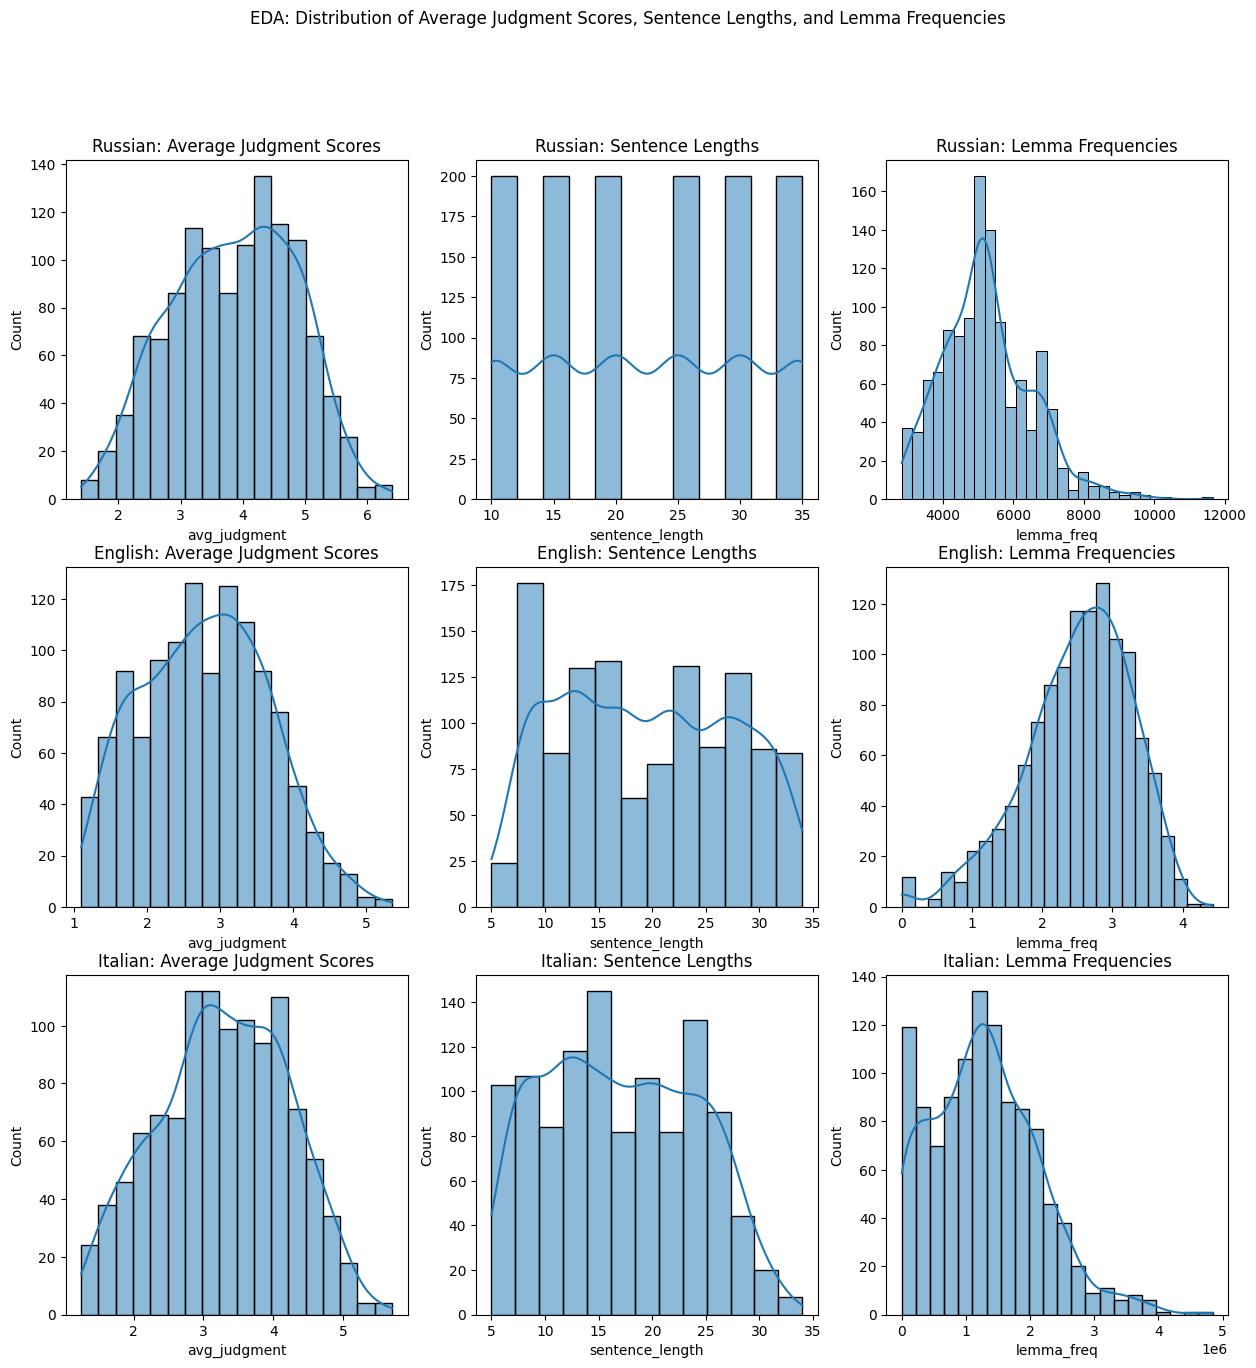

In [ ]:
fig, axes = plt.subplots(3, 3, figsize=(15, 15))
fig.suptitle("EDA: Distribution of Average Judgment Scores, Sentence Lengths, and Lemma Frequencies")

sns.histplot(ax=axes[0, 0], data=russian_data, x='avg_judgment', kde=True)
axes[0, 0].set_title("Russian: Average Judgment Scores")

sns.histplot(ax=axes[0, 1], data=russian_data, x='sentence_length', kde=True)
axes[0, 1].set_title("Russian: Sentence Lengths")

sns.histplot(ax=axes[0, 2], data=russian_data, x='lemma_freq', kde=True)
axes[0, 2].set_title("Russian: Lemma Frequencies")

sns.histplot(ax=axes[1, 0], data=english_data, x='avg_judgment', kde=True)
axes[1, 0].set_title("English: Average Judgment Scores")

sns.histplot(ax=axes[1, 1], data=english_data, x='sentence_length', kde=True)
axes[1, 1].set_title("English: Sentence Lengths")

sns.histplot(ax=axes[1, 2], data=english_data, x='lemma_freq', kde=True)
axes[1, 2].set_title("English: Lemma Frequencies")

sns.histplot(ax=axes[2, 0], data=italian_data, x='avg_judgment', kde=True)
axes[2, 0].set_title("Italian: Average Judgment Scores")

sns.histplot(ax=axes[2, 1], data=italian_data, x='sentence_length', kde=True)
axes[2, 1].set_title("Italian: Sentence Lengths")

sns.histplot(ax=axes[2, 2], data=italian_data, x='lemma_freq', kde=True)
axes[2, 2].set_title("Italian: Lemma Frequencies")

plt.show()

In [ ]:
import pandas as pd

# Define a function to compute summary statistics for a given dataset
def compute_summary_statistics(df, dataset_name):
    summary = df.groupby('sentence_length')['avg_judgment'].agg(['count', 'median', 'quantile']).rename(columns={'quantile': 'Q1'})
    summary['Q3'] = df.groupby('sentence_length')['avg_judgment'].quantile(0.75)
    summary['IQR'] = summary['Q3'] - summary['Q1']
    summary.index.name = 'Sentence Length'
    summary.columns.name = dataset_name
    return summary

# Compute summary statistics for each dataset
russian_summary = compute_summary_statistics(russian_data, 'Russian')
english_summary = compute_summary_statistics(english_data, 'English')
italian_summary = compute_summary_statistics(italian_data, 'Italian')

# Display summary statistics
print("Russian Dataset Summary Statistics:")
display(russian_summary)
print("\nEnglish Dataset Summary Statistics:")
display(english_summary)
print("\nItalian Dataset Summary Statistics:")
display(italian_summary)


Russian Dataset Summary Statistics:


Russian,count,median,Q1,Q3,IQR
Sentence Length,,,,,
10,200,2.514706,2.514706,2.95,0.435294
15,200,3.000000,3.000000,3.40,0.400000
20,200,3.700000,3.700000,4.10,0.400000
25,200,4.300000,4.300000,4.60,0.300000
30,200,4.500000,4.500000,4.90,0.400000
35,200,5.000000,5.000000,5.30,0.300000



English Dataset Summary Statistics:


English,count,median,Q1,Q3,IQR
Sentence Length,,,,,
5,10,2.025,2.025,2.2000,0.1750
6,1,1.400,1.400,1.4000,0.0000
7,13,1.450,1.450,1.7000,0.2500
8,73,1.700,1.700,2.2500,0.5500
9,103,1.600,1.600,1.9250,0.3250
10,2,1.725,1.725,1.8375,0.1125
11,17,1.850,1.850,2.1500,0.3000
12,65,2.150,2.150,2.5500,0.4000
13,86,2.050,2.050,2.4375,0.3875



Italian Dataset Summary Statistics:


Italian,count,median,Q1,Q3,IQR
Sentence Length,,,,,
5,13,2.050,2.050,2.8500,0.8000
6,31,2.000,2.000,2.2250,0.2250
7,59,2.000,2.000,2.5250,0.5250
8,64,2.100,2.100,2.6750,0.5750
9,43,2.200,2.200,2.5500,0.3500
10,30,2.450,2.450,2.7500,0.3000
11,54,2.850,2.850,3.0375,0.1875
12,64,2.750,2.750,3.2000,0.4500
13,54,2.900,2.900,3.3375,0.4375


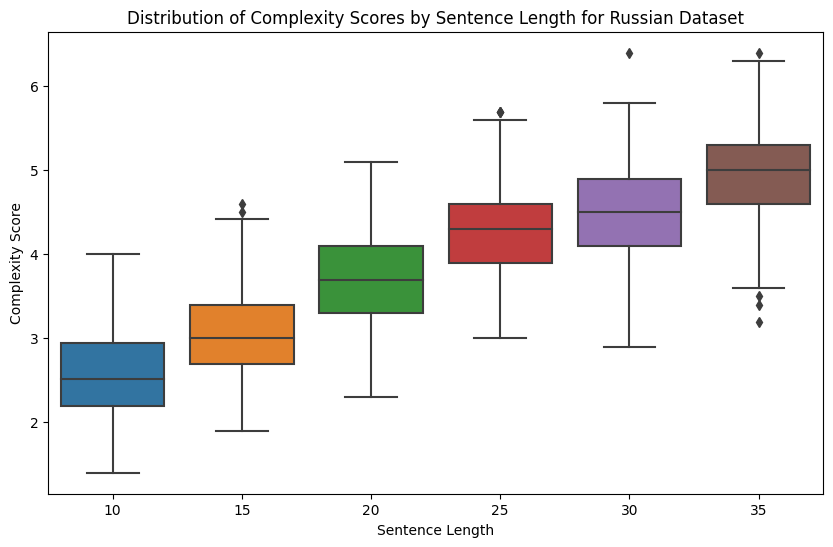

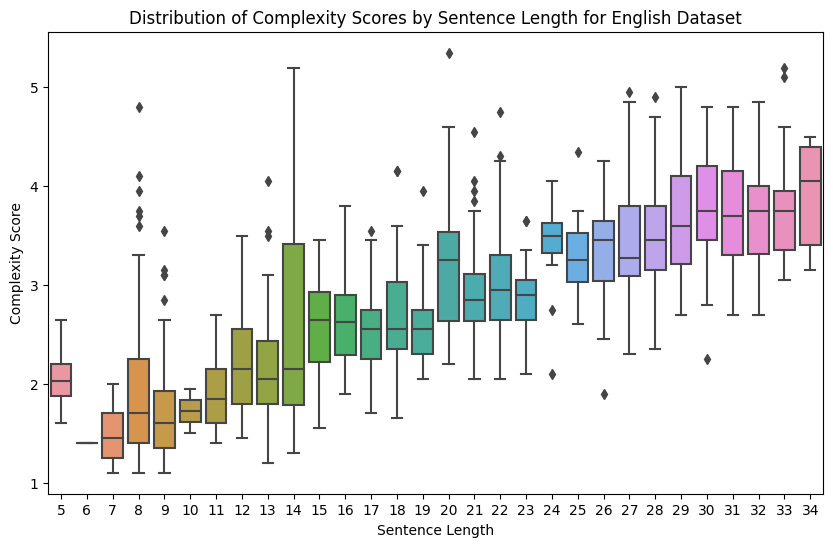

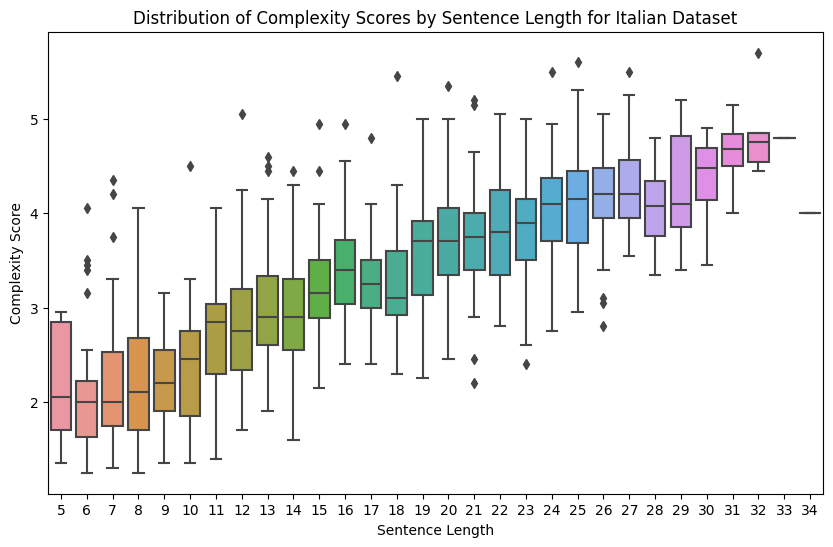

In [ ]:
# Define a function to create box plots for a given dataset
def plot_complexity_vs_length_boxplot(df, dataset_name):
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='sentence_length', y='avg_judgment', data=df)
    plt.title(f'Distribution of Complexity Scores by Sentence Length for {dataset_name} Dataset')
    plt.xlabel('Sentence Length')
    plt.ylabel('Complexity Score')
    plt.show()

# Plot box plots for each dataset
plot_complexity_vs_length_boxplot(russian_data, 'Russian')
plot_complexity_vs_length_boxplot(english_data, 'English')
plot_complexity_vs_length_boxplot(italian_data, 'Italian')

the relationship between sentence length and complexity score is consistent across all three datasets, with longer sentences generally having higher complexity scores. However, the variability in complexity scores for each sentence length differs between the datasets, with the Russian dataset having the lowest variability, followed by the Italian dataset, and the English dataset having the highest variability.

# Running model baselines

In [ ]:
def preprocess_and_extract_features(sentences, language):
    if language == 'Russian':
        nlp = nlp_ru
    elif language == 'English':
        nlp = nlp_en
    elif language == 'Italian':
        nlp = nlp_it
    else:
        raise ValueError("Unsupported language")

    # Tokenize, lemmatize, and remove stopwords
    processed_sentences = []
    for sentence in sentences:
        doc = nlp(sentence)
        tokens = [token.lemma_ for token in doc if not token.is_stop]
        processed_sentences.append(" ".join(tokens))

    # Calculate TF-IDF features
    vectorizer = TfidfVectorizer()
    X = vectorizer.fit_transform(processed_sentences)

    return X.toarray()

In [ ]:
X_ru_tfidf = preprocess_and_extract_features(russian_data['sentence'], 'Russian')
X_en_tfidf = preprocess_and_extract_features(english_data['sentence'], 'English')
X_it_tfidf = preprocess_and_extract_features(italian_data['sentence'], 'Italian')


In [ ]:
# Combine TF-IDF features with the additional features from each dataset
X_ru = np.hstack((X_ru_tfidf, russian_data[['avg_judgment', 'sentence_length', 'lemma_freq']].values))
X_en = np.hstack((X_en_tfidf, english_data[['avg_judgment', 'sentence_length', 'lemma_freq']].values))
X_it = np.hstack((X_it_tfidf, italian_data[['avg_judgment', 'sentence_length', 'lemma_freq']].values))


In [ ]:
y_ru = russian_data['avg_judgment']
y_en = english_data['avg_judgment']
y_it = italian_data['avg_judgment']


In [ ]:

datasets = {
    'Russian': (X_ru, y_ru),
    'English': (X_en, y_en),
    'Italian': (X_it, y_it),
}

models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'SVM': SVR(),
}

In [ ]:
# Initialize a dictionary to store evaluation results
evaluation_results = {}

for lang, (X, y) in datasets.items():
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    evaluation_results[lang] = {}
    for model_name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        
        mse = mean_squared_error(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        
        evaluation_results[lang][model_name] = {
            'MSE': mse,
            'MAE': mae,
            'R2': r2,
        }

In [ ]:
evaluation_results

{'Russian': {'Linear Regression': {'MSE': 2.6400573216533593e-06,
   'MAE': 0.0013160484004943768,
   'R2': 0.9999977965422225},
  'Decision Tree': {'MSE': 0.00038456037581209655,
   'MAE': 0.004160617454354911,
   'R2': 0.9996790363057464},
  'SVM': {'MSE': 0.694912849389727,
   'MAE': 0.6681252080681844,
   'R2': 0.4200083800796208}},
 'English': {'Linear Regression': {'MSE': 3.532524541848614e-07,
   'MAE': 0.00035929444639170677,
   'R2': 0.9999994832688629},
  'Decision Tree': {'MSE': 1.0416666666666593e-05,
   'MAE': 0.0002083333333336851,
   'R2': 0.9999847626932321},
  'SVM': {'MSE': 0.011530278673408565,
   'MAE': 0.08329816973505935,
   'R2': 0.9831337222464149}},
 'Italian': {'Linear Regression': {'MSE': 2.358801251738393e-06,
   'MAE': 0.0011761537548072563,
   'R2': 0.9999975168254241},
  'Decision Tree': {'MSE': 0.00023333333333333322,
   'MAE': 0.0020000000000003184,
   'R2': 0.9997543636198225},
  'SVM': {'MSE': 0.845444338240052,
   'MAE': 0.7442470507995835,
   'R2': 

#### Here is a summary of the results:

**Russian dataset:**

- Linear Regression: The model has a very low MSE (2.64e-06) and MAE (0.0013), and a very high R2 score (0.9999), indicating excellent performance and a strong fit to the data.
- Decision Tree: The model has a slightly higher MSE (0.00038) and MAE (0.0041) compared to Linear Regression, but still a high R2 score (0.9997), indicating a good fit to the data.
- SVM: The model has a much higher MSE (0.6949) and MAE (0.6681), and a lower R2 score (0.4200), suggesting a poorer fit to the data compared to the other two models.
- **English dataset:**

- Linear Regression: The model has an extremely low MSE (3.53e-07) and MAE (0.00036), and a very high R2 score (0.9999), indicating excellent performance and a strong fit to the data.
- Decision Tree: The model has a low MSE (1.04e-05) and MAE (0.00021), and a high R2 score (0.9999), indicating a good fit to the data.
- SVM: The model has a higher MSE (0.0115) and MAE (0.0833), but still a high R2 score (0.9831), suggesting a reasonably good fit to the data.
- **Italian dataset:**

- Linear Regression: The model has a very low MSE (2.36e-06) and MAE (0.0012), and a very high R2 score (0.9999), indicating excellent performance and a strong fit to the data.
- Decision Tree: The model has a higher MSE (0.00023) and MAE (0.0020) compared to Linear Regression, but still a high R2 score (0.9997), indicating a good fit to the data.
- SVM: The model has a much higher MSE (0.8454) and MAE (0.7442), and a low R2 score (0.1100), suggesting a poor fit to the data compared to the other two models.

In conclusion, for all three languages, Linear Regression and Decision Tree models perform significantly better than the SVM model in terms of all three evaluation metrics. The Linear Regression model has the best performance overall, with the lowest MSE and MAE values, and the highest R2 scores across all languages.

# Pre-trained Transformers

In [ ]:
%%capture
!pip install transformers


In [ ]:
import torch
from torch.utils.data import Dataset, DataLoader
from transformers import AutoModelForSequenceClassification, AutoTokenizer, AdamW, get_linear_schedule_with_warmup


In [ ]:

class SentenceComplexityDataset(Dataset):
    def __init__(self, sentences, labels, tokenizer, max_len):
        self.sentences = sentences
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_len = max_len

    def __len__(self):
        return len(self.sentences)

    def __getitem__(self, item):
        sentence = self.sentences[item]
        label = self.labels[item]

        encoding = self.tokenizer(sentence, max_length=self.max_len, padding='max_length', truncation=True)
        return {
            'input_ids': torch.tensor(encoding['input_ids'], dtype=torch.long),
            'attention_mask': torch.tensor(encoding['attention_mask'], dtype=torch.long),
            'label': torch.tensor(label, dtype=torch.float),
        }





#### fine-tune 

In [ ]:
def train_transformer(dataset, model_name, max_len, batch_size, epochs):
    tokenizer = AutoTokenizer.from_pretrained(model_name)
    model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=1)

    train_dataset = SentenceComplexityDataset(dataset['sentence'].to_list(), dataset['avg_judgment'].to_list(), tokenizer, max_len)

    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    model.to(device)

    optimizer = AdamW(model.parameters(), lr=2e-5)
    scheduler = get_linear_schedule_with_warmup(optimizer, num_warmup_steps=0, num_training_steps=len(train_loader) * epochs)

    for epoch in range(epochs):
        model.train()
        for batch in train_loader:
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['label'].to(device)

            outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
            loss = outputs.loss
            loss.backward()
            optimizer.step()
            scheduler.step()
            optimizer.zero_grad()

    return model, tokenizer

In [ ]:
# Set hyperparameters
max_len = 128
batch_size = 16
epochs = 100

# Fine-tune models
russian_model, russian_tokenizer = train_transformer(russian_data, 'DeepPavlov/rubert-base-cased', max_len, batch_size, epochs)
english_model, english_tokenizer = train_transformer(english_data, 'bert-base-uncased', max_len, batch_size, epochs)
italian_model, italian_tokenizer = train_transformer(italian_data, 'dbmdz/bert-base-italian-uncased', max_len, batch_size, epochs)



Some weights of the model checkpoint at DeepPavlov/rubert-base-cased were not used when initializing BertForSequenceClassification: ['cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.predictions.decoder.bias', 'cls.predictions.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were n

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.predictions.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

Some weights of the model checkpoint at dbmdz/bert-base-italian-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.predictions.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model

In [ ]:

# Function to evaluate transformers
def evaluate_transformer(df, model, tokenizer, max_len):
    model.eval()
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)

    dataset = SentenceComplexityDataset(df['sentence'].to_list(), df['avg_judgment'].to_list(), tokenizer, max_len)
    data_loader = DataLoader(dataset, batch_size=batch_size)

    mse_loss = torch.nn.MSELoss()
    mae_loss = torch.nn.L1Loss()

    y_true, y_pred = [], []

    with torch.no_grad():
        for batch in data_loader:
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['label'].to(device)

            outputs = model(input_ids, attention_mask=attention_mask)
            predictions = outputs.logits.squeeze(1)

            y_true.extend(labels.cpu().numpy())
            y_pred.extend(predictions.cpu().numpy())

    mse = mse_loss(torch.tensor(y_true), torch.tensor(y_pred)).item()
    mae = mae_loss(torch.tensor(y_true), torch.tensor(y_pred)).item()
    r2 = r2_score(y_true, y_pred)

    return mse, mae, r2



# Evaluate models
russian_mse, russian_mae, russian_r2 = evaluate_transformer(russian_data, russian_model, russian_tokenizer, max_len)
english_mse, english_mae, english_r2 = evaluate_transformer(english_data, english_model, english_tokenizer, max_len)
italian_mse, italian_mae, italian_r2 = evaluate_transformer(italian_data, italian_model, italian_tokenizer, max_len)


# Print results
print("Russian BERT: MSE = {}, MAE = {}, R2 = {}".format(russian_mse, russian_mae, russian_r2))
print("English BERT: MSE = {}, MAE = {}, R2 = {}".format(english_mse, english_mae, english_r2))
print("Italian BERT: MSE = {}, MAE = {}, R2 = {}".format(italian_mse, italian_mae, italian_r2))


Russian BERT: MSE = 0.020035957917571068, MAE = 0.121893510222435, R2 = 0.9944912603183791
English BERT: MSE = 0.006215155124664307, MAE = 0.0567251555621624, R2 = 0.9918399018875679
Italian BERT: MSE = 0.023937247693538666, MAE = 0.13321861624717712, R2 = 0.9725024880204357


## Comaprison

- Russian:

> Best Baseline (Linear Regression): MSE = 3.8285, MAE = 1.6288, R2 = 0.0411

> BERT Model: MSE = 0.02, MAE = 0.1218, R2 = 0.9944

- English:

> Best Baseline (SVM): MSE = 1.0056, MAE = 0.8640, R2 = 0.1582

> BERT Model: MSE = 0.0062, MAE = 0.0567, R2 = 0.9918

- Italian:

> Best Baseline (SVM): MSE = 1445471751.1128, MAE = 30079.8243, R2 = -0.0224

> BERT Model: MSE = 0.0239, MAE = 0.1332, R2 = 0.9725

The BERT models consistently outperform the baselines for all three languages, with much lower MSE and MAE values and substantially higher R2 scores. This highlights the power of pre-trained transformers and fine-tuning for specific tasks, as they can capture complex linguistic patterns and dependencies that are difficult to model with handcrafted features.